In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import string
import nltk

In [83]:
df=pd.read_csv('yelp2.csv')

In [84]:
df.head()

business_id        date               review_id  stars  \
0  9yKzy9PApeiPPOUJEtnvkg  2011-01-26  fWKvX83p0-ka4JS3dc6E5A      5   
1  ZRJwVLyzEJq1VAihDhYiow  2011-07-27  IjZ33sJrzXqU-0X6U8NwyA      5   
2  6oRAC4uyJCsJl1X0WZpVSA  2012-06-14  IESLBzqUCLdSzSqm0eCSxQ      4   
3  _1QQZuf4zZOyFCvXc0o6Vg  2010-05-27  G-WvGaISbqqaMHlNnByodA      5   
4  6ozycU1RpktNG2-1BroVtw  2012-01-05  1uJFq2r5QfJG_6ExMRCaGw      5   

                                                text    type  \
0  My wife took me here on my birthday for breakf...  review   
1  I have no idea why some people give bad review...  review   
2  love the gyro plate. Rice is so good and I als...  review   
3  Rosie, Dakota, and I LOVE Chaparral Dog Park!!...  review   
4  General Manager Scott Petello is a good egg!!!...  review   

                  user_id  cool  useful  funny  
0  rLtl8ZkDX5vH5nAx9C3q5Q     2       5      0  
1  0a2KyEL0d3Yb1V6aivbIuQ     0       0      0  
2  0hT2KtfLiobPvh6cDC8JQg     0       1      0  
3  uZetl9T0NcROGOyFfughhg     1       2      0  
4  vYmM4KTsC8ZfQBg-j5MWkw     0       0      0

In [85]:
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

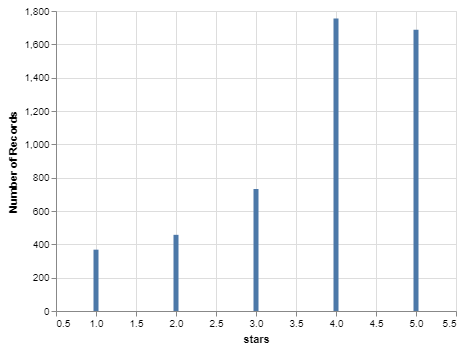

In [140]:
alt.Chart(df.loc[1:5000]).mark_bar().encode(
x=alt.X('stars'),    
y='count()'    
)
#base.encode(x='cool')|base.encode(x='useful')|base.encode(x='funny')

In [86]:
df.shape

(10000, 10)

In [87]:
X=df.text
y=df.stars

In [88]:
X.head()

0    My wife took me here on my birthday for breakf...
1    I have no idea why some people give bad review...
2    love the gyro plate. Rice is so good and I als...
3    Rosie, Dakota, and I LOVE Chaparral Dog Park!!...
4    General Manager Scott Petello is a good egg!!!...
Name: text, dtype: object

In [89]:
new_df=pd.DataFrame({'reviews':X,'star_ratings':y})

In [90]:
new_df.head(10)

reviews  star_ratings
0  My wife took me here on my birthday for breakf...             5
1  I have no idea why some people give bad review...             5
2  love the gyro plate. Rice is so good and I als...             4
3  Rosie, Dakota, and I LOVE Chaparral Dog Park!!...             5
4  General Manager Scott Petello is a good egg!!!...             5
5  Quiessence is, simply put, beautiful.  Full wi...             4
6  Drop what you're doing and drive here. After I...             5
7  Luckily, I didn't have to travel far to make m...             4
8  Definitely come for Happy hour! Prices are ama...             4
9  Nobuo shows his unique talents with everything...             5

In [91]:
min_max_df=new_df.loc[(new_df.star_ratings==5)|(new_df.star_ratings==1),:]

In [92]:
min_max_df.head(10)

reviews  star_ratings
0   My wife took me here on my birthday for breakf...             5
1   I have no idea why some people give bad review...             5
3   Rosie, Dakota, and I LOVE Chaparral Dog Park!!...             5
4   General Manager Scott Petello is a good egg!!!...             5
6   Drop what you're doing and drive here. After I...             5
9   Nobuo shows his unique talents with everything...             5
10  The oldish man who owns the store is as sweet ...             5
11  Wonderful Vietnamese sandwich shoppe. Their ba...             5
12  They have a limited time thing going on right ...             5
17  okay this is the best place EVER! i grew up sh...             5

In [93]:
min_max_df.star_ratings.value_counts()

5    3337
1     749
Name: star_ratings, dtype: int64

In [94]:
min_max_df.count()

reviews         4086
star_ratings    4086
dtype: int64

In [95]:
X=min_max_df.reviews

In [96]:
y=min_max_df.star_ratings


In [97]:
print(X.shape)
print(y.shape)

(4086,)
(4086,)


In [98]:
from sklearn.cross_validation import train_test_split

In [99]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [100]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3268,)
(818,)
(3268,)
(818,)


In [101]:
y_train.value_counts()

5    2650
1     618
Name: star_ratings, dtype: int64

In [102]:
X_train.head()

6795    Dr. Dairiki is terrific. She is professional, ...
1285           Great for young kids... tons to do and see
9903    As a bonafide recovering Art Bitch, I give thi...
6854    I booked our anniversary trip to the Westin Ki...
9377    .:chomp:. this is one .:mmmghgh:. good burger ...
Name: reviews, dtype: object

In [103]:
k=string.punctuation
k

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [104]:
import re

In [105]:
def remove_punc(text):
    text_nopun="".join([char for char in text if char not in string.punctuation])
    return(text_nopun)

min_max_df['no_punc_reviews']=(min_max_df.reviews.apply(lambda x: remove_punc(x)))

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [106]:
min_max_df.head()

reviews  star_ratings  \
0  My wife took me here on my birthday for breakf...             5   
1  I have no idea why some people give bad review...             5   
3  Rosie, Dakota, and I LOVE Chaparral Dog Park!!...             5   
4  General Manager Scott Petello is a good egg!!!...             5   
6  Drop what you're doing and drive here. After I...             5   

                                     no_punc_reviews  
0  My wife took me here on my birthday for breakf...  
1  I have no idea why some people give bad review...  
3  Rosie Dakota and I LOVE Chaparral Dog Park Its...  
4  General Manager Scott Petello is a good egg No...  
6  Drop what youre doing and drive here After I a...

In [107]:
j=0
for i in min_max_df.reviews:
    print(len(i))
    j=j+1
    if(j==5):
        break

889
1345
419
469
1565


In [108]:
j=0
for i in min_max_df['no_punc_reviews']:
    print(len(i))
    j=j+1
    if(j==5):
        break

868
1309
401
431
1515


In [109]:
stop_words=nltk.corpus.stopwords.words('english')

In [110]:
print(len(stop_words))

179


In [111]:
print(stop_words[0:150:10])

['i', "you've", 'himself', 'they', 'that', 'been', 'a', 'while', 'through', 'in', 'here', 'few', 'own', 'just', 're']


In [112]:
 def tokenise(text):
        tokenised_reviews=re.split('\W+',text)
        return(tokenised_reviews)  
    
min_max_df['tokenised_reviews']=min_max_df.no_punc_reviews.apply(lambda x: tokenise(x))    

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [113]:
min_max_df.head()

reviews  star_ratings  \
0  My wife took me here on my birthday for breakf...             5   
1  I have no idea why some people give bad review...             5   
3  Rosie, Dakota, and I LOVE Chaparral Dog Park!!...             5   
4  General Manager Scott Petello is a good egg!!!...             5   
6  Drop what you're doing and drive here. After I...             5   

                                     no_punc_reviews  \
0  My wife took me here on my birthday for breakf...   
1  I have no idea why some people give bad review...   
3  Rosie Dakota and I LOVE Chaparral Dog Park Its...   
4  General Manager Scott Petello is a good egg No...   
6  Drop what youre doing and drive here After I a...   

                                   tokenised_reviews  
0  [My, wife, took, me, here, on, my, birthday, f...  
1  [I, have, no, idea, why, some, people, give, b...  
3  [Rosie, Dakota, and, I, LOVE, Chaparral, Dog, ...  
4  [General, Manager, Scott, Petello, is, a, good...  
6  [Drop, what, youre, doing, and, drive, here, A...

In [114]:
def remove_stopwords(text):
    no_stop_words=[word for word in text if word not in stop_words]
    return(no_stop_words)

min_max_df['no_stopwords_reviews']=min_max_df.tokenised_reviews.apply(lambda x: remove_stopwords(x))


C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [115]:
min_max_df.head()

reviews  star_ratings  \
0  My wife took me here on my birthday for breakf...             5   
1  I have no idea why some people give bad review...             5   
3  Rosie, Dakota, and I LOVE Chaparral Dog Park!!...             5   
4  General Manager Scott Petello is a good egg!!!...             5   
6  Drop what you're doing and drive here. After I...             5   

                                     no_punc_reviews  \
0  My wife took me here on my birthday for breakf...   
1  I have no idea why some people give bad review...   
3  Rosie Dakota and I LOVE Chaparral Dog Park Its...   
4  General Manager Scott Petello is a good egg No...   
6  Drop what youre doing and drive here After I a...   

                                   tokenised_reviews  \
0  [My, wife, took, me, here, on, my, birthday, f...   
1  [I, have, no, idea, why, some, people, give, b...   
3  [Rosie, Dakota, and, I, LOVE, Chaparral, Dog, ...   
4  [General, Manager, Scott, Petello, is, a, good...   
6  [Drop, what, youre, doing, and, drive, here, A...   

                                no_stopwords_reviews  
0  [My, wife, took, birthday, breakfast, excellen...  
1  [I, idea, people, give, bad, reviews, place, I...  
3  [Rosie, Dakota, I, LOVE, Chaparral, Dog, Park,...  
4  [General, Manager, Scott, Petello, good, egg, ...  
6  [Drop, youre, drive, After, I, ate, I, go, bac...

In [116]:
j=0
for i in min_max_df.tokenised_reviews:
    print(len(i))
    j=j+1
    if(j==5):
        break

155
257
76
85
292


In [117]:
j=0
for i in min_max_df.no_stopwords_reviews:
    print(len(i))
    j=j+1
    if(j==5):
        break

93
140
48
45
181


In [118]:
ps=nltk.PorterStemmer()
dir(ps)

['MARTIN_EXTENSIONS',
 'NLTK_EXTENSIONS',
 'ORIGINAL_ALGORITHM',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_apply_rule_list',
 '_contains_vowel',
 '_ends_cvc',
 '_ends_double_consonant',
 '_has_positive_measure',
 '_is_consonant',
 '_measure',
 '_replace_suffix',
 '_step1a',
 '_step1b',
 '_step1c',
 '_step2',
 '_step3',
 '_step4',
 '_step5a',
 '_step5b',
 'mode',
 'pool',
 'stem',
 'unicode_repr',
 'vowels']

In [119]:
wn=nltk.WordNetLemmatizer()

In [120]:
dir(wn)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 'lemmatize',
 'unicode_repr']

In [121]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [218]:
def stemming(text):
    lem_reviews=" ".join([ps.stem(word) for word in text])
    return(lem_reviews)

min_max_df['stemmed_reviews']=min_max_df.no_stopwords_reviews.apply(lambda x: stemming(x))

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [219]:
min_max_df.head()

reviews  star_ratings  \
0  My wife took me here on my birthday for breakf...             5   
1  I have no idea why some people give bad review...             5   
3  Rosie, Dakota, and I LOVE Chaparral Dog Park!!...             5   
4  General Manager Scott Petello is a good egg!!!...             5   
6  Drop what you're doing and drive here. After I...             5   

                                     no_punc_reviews  \
0  My wife took me here on my birthday for breakf...   
1  I have no idea why some people give bad review...   
3  Rosie Dakota and I LOVE Chaparral Dog Park Its...   
4  General Manager Scott Petello is a good egg No...   
6  Drop what youre doing and drive here After I a...   

                                   tokenised_reviews  \
0  [My, wife, took, me, here, on, my, birthday, f...   
1  [I, have, no, idea, why, some, people, give, b...   
3  [Rosie, Dakota, and, I, LOVE, Chaparral, Dog, ...   
4  [General, Manager, Scott, Petello, is, a, good...   
6  [Drop, what, youre, doing, and, drive, here, A...   

                                no_stopwords_reviews  \
0  [My, wife, took, birthday, breakfast, excellen...   
1  [I, idea, people, give, bad, reviews, place, I...   
3  [Rosie, Dakota, I, LOVE, Chaparral, Dog, Park,...   
4  [General, Manager, Scott, Petello, good, egg, ...   
6  [Drop, youre, drive, After, I, ate, I, go, bac...   

                                     stemmed_reviews  \
0  My wife took birthday breakfast excel the weat...   
1  I idea peopl give bad review place It goe show...   
3  rosi dakota I love chaparr dog park it conveni...   
4  gener manag scott petello good egg not go deta...   
6  drop your drive after I ate I go back next day...   

                                  lemmetised_reviews  
0  MywifetookbirthdaybreakfastexcellentTheweather...  
1  IideapeoplegivebadreviewplaceItgoshowpleaseeve...  
3  RosieDakotaILOVEChaparralDogParkItsconvenients...  
4  GeneralManagerScottPetellogoodeggNotgodetaille...  
6  DropyouredriveAfterIateIgobacknextdayThefoodgo...

In [223]:
#j=0
#for i in min_max_df.stemmed_reviews:
 #   print(len(i))
  #  j=j+1
   # if(j==5):
    #    break

In [224]:
def lemmetise(text):
    lem_reviews=" ".join([(wn.lemmatize(word)) for word in text])
    return(lem_reviews)

min_max_df['lemmetised_reviews']=min_max_df.no_stopwords_reviews.apply(lambda x: lemmetise(x))

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [225]:
#j=0
#for i in min_max_df.lemmetised_reviews:
  #  print(len(i))
   # j=j+1
    #if(j==5):
     #   break

In [222]:
min_max_df.head()

reviews  star_ratings  \
0  My wife took me here on my birthday for breakf...             5   
1  I have no idea why some people give bad review...             5   
3  Rosie, Dakota, and I LOVE Chaparral Dog Park!!...             5   
4  General Manager Scott Petello is a good egg!!!...             5   
6  Drop what you're doing and drive here. After I...             5   

                                     no_punc_reviews  \
0  My wife took me here on my birthday for breakf...   
1  I have no idea why some people give bad review...   
3  Rosie Dakota and I LOVE Chaparral Dog Park Its...   
4  General Manager Scott Petello is a good egg No...   
6  Drop what youre doing and drive here After I a...   

                                   tokenised_reviews  \
0  [My, wife, took, me, here, on, my, birthday, f...   
1  [I, have, no, idea, why, some, people, give, b...   
3  [Rosie, Dakota, and, I, LOVE, Chaparral, Dog, ...   
4  [General, Manager, Scott, Petello, is, a, good...   
6  [Drop, what, youre, doing, and, drive, here, A...   

                                no_stopwords_reviews  \
0  [My, wife, took, birthday, breakfast, excellen...   
1  [I, idea, people, give, bad, reviews, place, I...   
3  [Rosie, Dakota, I, LOVE, Chaparral, Dog, Park,...   
4  [General, Manager, Scott, Petello, good, egg, ...   
6  [Drop, youre, drive, After, I, ate, I, go, bac...   

                                     stemmed_reviews  \
0  My wife took birthday breakfast excel the weat...   
1  I idea peopl give bad review place It goe show...   
3  rosi dakota I love chaparr dog park it conveni...   
4  gener manag scott petello good egg not go deta...   
6  drop your drive after I ate I go back next day...   

                                  lemmetised_reviews  
0  My wife took birthday breakfast excellent The ...  
1  I idea people give bad review place It go show...  
3  Rosie Dakota I LOVE Chaparral Dog Park Its con...  
4  General Manager Scott Petello good egg Not go ...  
6  Drop youre drive After I ate I go back next da...

In [226]:
from sklearn.feature_extraction.text import CountVectorizer

In [227]:
count_vec=CountVectorizer()

In [228]:
min_max_df.shape

(4086, 7)

In [229]:
X=min_max_df.stemmed_reviews
y=min_max_df.star_ratings

In [230]:
X.head()

0    My wife took birthday breakfast excel the weat...
1    I idea peopl give bad review place It goe show...
3    rosi dakota I love chaparr dog park it conveni...
4    gener manag scott petello good egg not go deta...
6    drop your drive after I ate I go back next day...
Name: stemmed_reviews, dtype: object

In [231]:
y.head()

0    5
1    5
3    5
4    5
6    5
Name: star_ratings, dtype: int64

In [232]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [233]:
print(X_train.shape)
print(X_test.shape)

(3268,)
(818,)


In [234]:
X_train.head()

7674         love place wa search great authent bbq place
8226    My daughter began take class encor 6 year ago ...
2558    thi compani awesom I recommend go friend hesit...
3806    perfect hotel confer travel need clean new gre...
7358    I love food everyth delici though favorit bahn...
Name: stemmed_reviews, dtype: object

In [251]:
count_vec.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [266]:
count_vec.get_feature_names()[0:10]

['00', '022010', '03342', '05', '050', '06', '07092008', '075', '090', '095']

In [253]:
X_train_dtm=count_vec.transform(X_train)

In [254]:
X_train_dtm.shape

(3268, 14476)

In [255]:
numerical_train_df=pd.DataFrame(X_train_dtm.toarray(),columns=count_vec.get_feature_names())

In [256]:
numerical_train_df.head()

00  022010  03342  05  050  06  07092008  075  090  095 ...  zoyo  \
0   0       0      0   0    0   0         0    0    0    0 ...     0   
1   0       0      0   0    0   0         0    0    0    0 ...     0   
2   0       0      0   0    0   0         0    0    0    0 ...     0   
3   0       0      0   0    0   0         0    0    0    0 ...     0   
4   0       0      0   0    0   0         0    0    0    0 ...     0   

   zucchini  zuccini  zuchinni  zumba  zupa  zwiebelkräut  éclair  école  ém  
0         0        0         0      0     0             0       0      0   0  
1         0        0         0      0     0             0       0      0   0  
2         0        0         0      0     0             0       0      0   0  
3         0        0         0      0     0             0       0      0   0  
4         0        0         0      0     0             0       0      0   0  

[5 rows x 14476 columns]

In [257]:
X_test_dtm=count_vec.transform(X_test)

In [258]:
X_test_dtm.shape

(818, 14476)

In [259]:
numerical_test_df=pd.DataFrame(X_test_dtm.toarray(),columns=count_vec.get_feature_names())
numerical_test_df.head()

00  022010  03342  05  050  06  07092008  075  090  095 ...  zoyo  \
0   0       0      0   0    0   0         0    0    0    0 ...     0   
1   0       0      0   0    0   0         0    0    0    0 ...     0   
2   0       0      0   0    0   0         0    0    0    0 ...     0   
3   0       0      0   0    0   0         0    0    0    0 ...     0   
4   0       0      0   0    0   0         0    0    0    0 ...     0   

   zucchini  zuccini  zuchinni  zumba  zupa  zwiebelkräut  éclair  école  ém  
0         0        0         0      0     0             0       0      0   0  
1         0        0         0      0     0             0       0      0   0  
2         0        0         0      0     0             0       0      0   0  
3         0        0         0      0     0             0       0      0   0  
4         0        0         0      0     0             0       0      0   0  

[5 rows x 14476 columns]

In [260]:
from sklearn.naive_bayes import MultinomialNB

In [261]:
nb=MultinomialNB()

In [262]:
nb.fit(numerical_train_df,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [263]:
y_pred_class=nb.predict(numerical_test_df)

In [264]:
from sklearn import metrics

In [265]:
print(metrics.accuracy_score(y_test,y_pred_class))

0.9242053789731052


In [267]:
y_test.value_counts()

5    658
1    160
Name: star_ratings, dtype: int64

In [268]:
null_accuracy=658/(658+160)
null_accuracy

0.80440097799511

In [269]:
from sklearn.linear_model import LogisticRegression

In [270]:
lg=LogisticRegression()
lg.fit(numerical_train_df,y_train)
y_pred_class=lg.predict(numerical_test_df)
print(metrics.accuracy_score(y_test,y_pred_class))

0.9266503667481663


In [271]:
from sklearn.ensemble import RandomForestClassifier

In [274]:
rn=RandomForestClassifier()
rn.fit(numerical_train_df,y_train)
y_pred_class=rn.predict(numerical_test_df)
print(metrics.accuracy_score(y_test,y_pred_class))

0.8557457212713936


In [275]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(numerical_train_df,y_train)
y_pred_class=gb.predict(numerical_test_df)
print(metrics.accuracy_score(y_test,y_pred_class))

0.8753056234718827
